# Function Approximation by ReLU Networks using Faber-Shauder system


In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import models_approx as mod_ap
import visualization as vis

## You can use models directly from models_approx file

In [13]:
input_size = 100
k_iter = 5
x = torch.linspace(0, 1, input_size)

#For x^2
x_square = x ** 2
model_square = mod_ap.square_approximation(k_iter, input_size)
prediction_square = model_square(x)

#For x^3
x_cube = x ** 3
model_cube = mod_ap.cube_approximation(k_iter, input_size)
prediction_cube = model_cube(x)

#For e^x
x_exp = torch.exp(x)
model_exp = mod_ap.exponent_approximation(k_iter, input_size)
prediction_exp = model_exp(x)

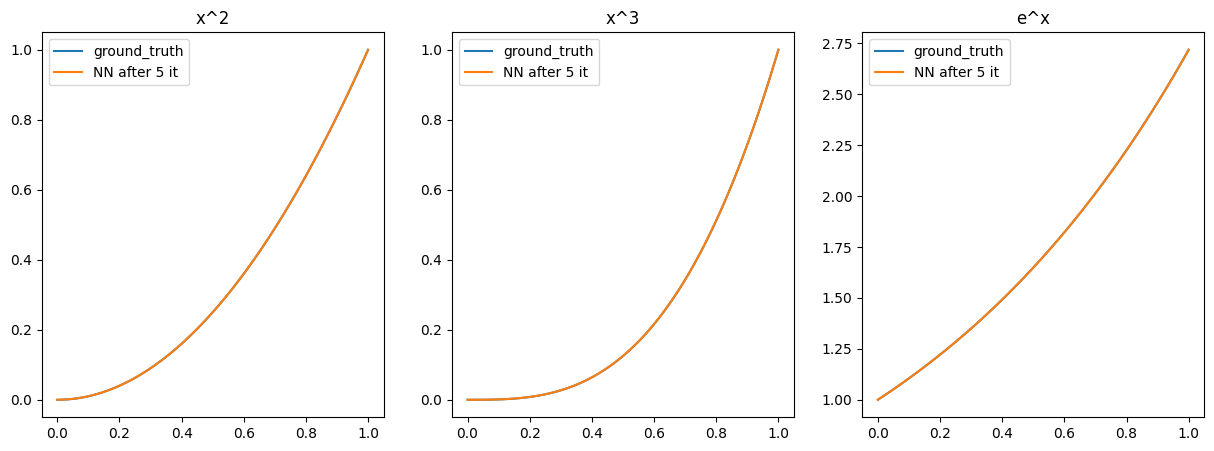

In [15]:
#Actually, after small number if iterations graphics are almost the same
plt.figure(figsize=(15, 5))

plt.subplot(131)  
plt.plot(x, x_square, label = "ground_truth")
plt.plot(x, prediction_square.detach().numpy(), label = "NN after {} it".format(k_iter))
plt.title('x^2')
plt.legend()

plt.subplot(132) 
plt.plot(x, x_cube, label = "ground_truth")
plt.plot(x, prediction_cube.detach().numpy(), label = "NN after {} it".format(k_iter))
plt.title('x^3')
plt.legend()

plt.subplot(133)
plt.plot(x, x_exp, label = "ground_truth")
plt.plot(x, prediction_exp.detach().numpy(), label = "NN after {} it".format(k_iter))
plt.title('e^x')
plt.legend()

plt.show()

## Visualization file has couple of functions for error computation and additional graphics

### uniform_maximum_error

Compute uniform maximum error - the main metric from the paper:

$$||f - \widetilde{f}||_C = \max_{x \in [0,1]} |f(x) - \widetilde{f}(x)|$$

It takes $2$ arguments: true values and predicted values arrays

We can check errors for our already computed predictions

In [19]:
print("Uniform maximum error for x^2 approximation with {} iterations is:".format(k_iter), vis.uniform_maximum_error(x_square, prediction_square).item())
print("Uniform maximum error for x^3 approximation with {} iterations is:".format(k_iter), vis.uniform_maximum_error(x_cube, prediction_cube).item())
print("Uniform maximum error for e^x approximation with {} iterations is:".format(k_iter), vis.uniform_maximum_error(x_exp, prediction_exp).item())

Uniform maximum error for x^2 approximation with 5 iterations is: 0.000244140625
Uniform maximum error for x^3 approximation with 5 iterations is: 0.0006595849990844727
Uniform maximum error for e^x approximation with 5 iterations is: 0.0002994537353515625


### model_test
Inputs:
1. x - torch array, for which we will compute function

2. name of the function, which we want to approximate. Takes values \{"square", "cube", "exponent" \}

3. min_iter, max_iter (int) - interval of iterations for which we will compute error

4. show (bool) - set True if you want to have a look on predicted functions for each k_iter $\in$ [min_iter, max_iter] 

Return:
errors - array of uniform maximum errors for predicted function for each k_iter $\in$ [min_iter, max_iter]

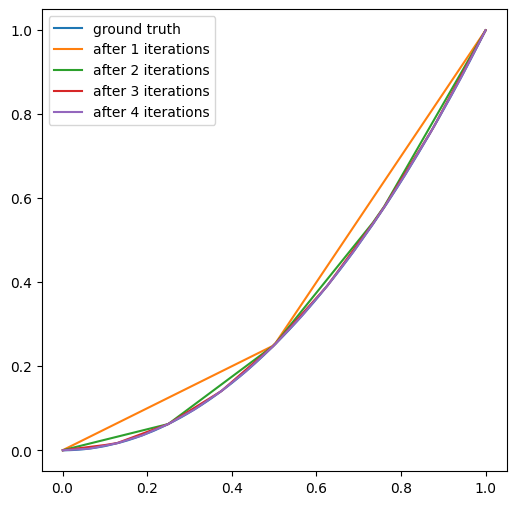

In [2]:
errors_square = vis.model_test(torch.rand(2**8), "square", 1, 5)

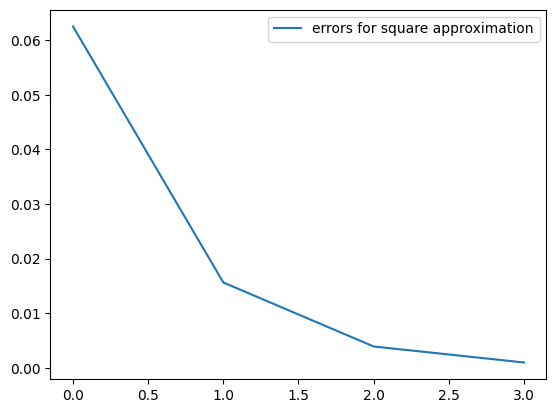

In [3]:
plt.plot(errors_square, label = "errors for square approximation")
plt.legend()
plt.show()